## 基于深度学习的文本分类(一）

与传统机器学习不同，深度学习既提供特征提取功能，也可以完成分类的功能


### 1. 现有文本表示方法的缺陷

- one-hot :转换得到的向量维度很高，需要较长的训练实践；
- Bag of Words、N-gram、TF-IDF：没有考虑单词与单词之间的关系，只是进行了统计。
- 与这些表示方法不同，深度学习也可以用于文本表示，还可以将其映射到一个低纬空间。其中比较典型的例子有：FastText、Word2Vec和Bert。

### FastText

#### 1. FastText的使用和基础原理

- fastText方法包含三部分，模型架构，层次SoftMax和N-gram特征。

##### 1.架构
- FastText是一种典型的深度学习词向量的表示方法，它非常简单通过Embedding层将单词映射到稠密空间，然后将句子中所有的单词在Embedding空间中进行平均，进而完成分类操作。

- FastText是一个三层的神经网络，输入层、隐含层和输出层。

- 其中x1,x2,…,xN−1,xN表示一个文本中的n-gram向量，每个特征是词向量的平均值。

<img src="1595580340752.png" alt="1595580340752" style="zoom:50%;" />

- fastText 模型输入一个词的序列（一段文本或者一句话)，输出这个词序列属于不同类别的概率。
- 序列中的词和词组组成特征向量，特征向量通过线性变换映射到中间层，中间层再映射到标签。
- fastText 在预测标签时使用了非线性激活函数，但在中间层不使用非线性激活函数。fastText 模型架构和 Word2Vec 中的 CBOW 模型很类似。不同之处在于，fastText 预测标签，而 CBOW 模型预测中间词。

##### 2.层次SoftMax
- 标准的Softmax回归中，要计算y=j时的Softmax概率：，我们需要对所有的K个概率做归一化，这在|y|很大时非常耗时。于是，分层Softmax诞生了，它的基本思想是使用树的层级结构替代扁平化的标准Softmax，使得在计算时，只需计算一条路径上的所有节点的概率值，无需在意其它的节点。

- fastText 也利用了类别（class）不均衡这个事实（一些类别出现次数比其他的更多），通过使用 Huffman 算法建立用于表征类别的树形结构。因此，频繁出现类别的树形结构的深度要比不频繁出现类别的树形结构的深度要小，这也使得进一步的计算效率更高。

- Huffman树：给定N个权值作为N个叶子结点，构造一棵二叉树，若该树的带权路径长度达到最小，称这样的二叉树为最优二叉树，也称为哈夫曼树(Huffman Tree)。哈夫曼树是带权路径长度最短的树，权值较大的结点离根较近。
- Huffman树的构造：https://blog.csdn.net/qq_29519041/article/details/81428934

<img src="1595581036580.png" alt="1595581036580" style="zoom: 33%;" />

- 和CBOW一样，fastText模型也只有三层：输入层、隐含层、输出层（Hierarchical Softmax），输入都是多个经向量表示的单词，输出都是一个特定的target，隐含层都是对多个词向量的叠加平均。
- 不同的是，CBOW的输入是目标单词的上下文，fastText的输入是多个单词及其n-gram特征，这些特征用来表示单个文档；CBOW的输入单词被onehot编码过，fastText的输入特征是被embedding过；CBOW的输出是目标词汇，fastText的输出是文档对应的类标。

- 细节：https://blog.csdn.net/itplus/article/details/37969979
##### 3.N-gram特征
- fastText 可以用于文本分类和句子分类。不管是文本分类还是句子分类，我们常用的特征是词袋模型。但词袋模型不能考虑词之间的顺序，因此 fastText 还加入了 N-gram 特征。为了提高效率，我们需要过滤掉低频的 N-gram。


##### 4. 总结
- fastText是一个快速文本分类算法，与基于神经网络的分类算法相比有两大优点：
    - 1、fastText在保持高精度的情况下加快了训练速度和测试速度
    - 2、fastText不需要预训练好的词向量，fastText会自己训练词向量
    - 3、fastText两个重要的优化：Hierarchical Softmax、N-gram

##### 5. 使用keras实现的FastText网络结构：

![1595581962279](1595581962279.png)


#### 2.  代码

##### 初步调参
- **调参后发现，都出现了过拟合现象，当 wordNgrams =1时不是很严重，但它的训练集验证集效果都不好**
- **当 wordNgrams>=3,学习率>=0.3时，训练集得分都达到了0.99以上；测试集得分也不错。但是同时过拟合现象开始严重**


| 训练集得分 | wordNgrams |        |        |        |        |
| ---------- | ---------- | ------ | ------ | ------ | ------ |
| 学习率     | 1          | 2      | 3      | 4      | avg    |
| 0.05       | 0.8837     | 0.9271 | 0.9109 | 0.8924 | 0.9035 |
| 0.1        | 0.8943     | 0.9588 | 0.9587 | 0.9509 | 0.9407 |
| 0.3        | 0.8997     | 0.9885 | 0.9927 | 0.9919 | 0.9682 |
| 0.5        | 0.9018     | 0.9938 | 0.9977 | 0.9974 | 0.9727 |
| 0.7        | 0.9017     | 0.9953 | 0.9988 | 0.9989 | 0.9737 |
| avg        | 0.8962     | 0.9727 | 0.9717 | 0.9663 |        |



| 验证集得分 | wordNgrams |        |        |        |        |
| ---------- | ---------- | ------ | ------ | ------ | ------ |
| 学习率     | 1          | 2      | 3      | 4      | avg    |
| 0.05       | 0.8657     | 0.8992 | 0.8937 | 0.8671 | 0.8814 |
| 0.1        | 0.8807     | 0.9130 | 0.9171 | 0.9082 | 0.9048 |
| 0.3        | 0.8694     | 0.9163 | 0.9216 | 0.9184 | 0.9064 |
| 0.5        | 0.8699     | 0.9235 | 0.9189 | 0.9170 | 0.9073 |
| 0.7        | 0.8676     | 0.9135 | 0.9248 | 0.9174 | 0.9058 |
| avg        | 0.8707     | 0.9131 | 0.9152 | 0.9056 |        |

| 可调整方差 | wordNgrams |        |        |        |        |
| ---------- | ---------- | ------ | ------ | ------ | ------ |
| 学习率     | 1          | 2      | 3      | 4      |        |
| 0.05       | 0.0181     | 0.0279 | 0.0172 | 0.0253 | 0.0221 |
| 0.1        | 0.0136     | 0.0458 | 0.0416 | 0.0427 | 0.0359 |
| 0.3        | 0.0303     | 0.0722 | 0.0711 | 0.0735 | 0.0618 |
| 0.5        | 0.0319     | 0.0704 | 0.0788 | 0.0804 | 0.0654 |
| 0.7        | 0.0341     | 0.0819 | 0.0740 | 0.0815 | 0.0679 |
| avg        | 0.0256     | 0.0596 | 0.0565 | 0.0607 |        |

In [ ]:
import gc 
import fasttext
import pandas as pd
from sklearn.metrics import f1_score

# 转换为FastText需要的格式
train_df = pd.read_csv('train_set.csv', nrows=200000)
train_df['label_ft'] = '__label__' + train_df['label'].astype(str)
## 将数据分成20块
train_df=train_df.reset_index(drop=False)
train_df['chunk']=train_df['index'].apply(lambda x:x//10000)
del train_df['index']

In [4]:
a = 0
for i in [0.05,0.1,0.3,0.5,0.7]:
    for j in [1,2,3,4]:
        train_df[train_df.chunk!=a][['text_nostopwords','label_ft']].to_csv('train{}.csv'.format(a), index=None, header=None, sep='\t')
        gc.collect()
        model = fasttext.train_supervised('train{}.csv'.format(a), lr=i, wordNgrams=j, verbose=1, minCount=2, epoch=20, loss="hs")
        gc.collect()
        val_pred = [model.predict(x)[0][0].split('__')[-1] for x in train_df[train_df.chunk==a]['text_nostopwords']]
        print('第{}轮验证集得分：'.format(a),f1_score(train_df[train_df.chunk==a]['label'].values.astype(str), val_pred, average='macro'))
        model.save_model("model_{}.bin".format(a))
        gc.collect()
        a+=1

第0轮验证集得分： 0.8656537915456466
第1轮验证集得分： 0.8992325884008228
第2轮验证集得分： 0.8936774998581996
第3轮验证集得分： 0.867112682743608
第4轮验证集得分： 0.8807203365230276
第5轮验证集得分： 0.913009034074127
第6轮验证集得分： 0.9170905990064914
第7轮验证集得分： 0.9082022953710883
第8轮验证集得分： 0.8694391418629911
第9轮验证集得分： 0.9163202602150945
第10轮验证集得分： 0.9215890420148881
第11轮验证集得分： 0.9183973157929071
第12轮验证集得分： 0.8699130448049852
第13轮验证集得分： 0.9234506098836724
第14轮验证集得分： 0.9189158914219596
第15轮验证集得分： 0.9169980520220228
第16轮验证集得分： 0.8676112908612829
第17轮验证集得分： 0.9134748238130381
第18轮验证集得分： 0.9247903376585985
第19轮验证集得分： 0.9174080596528963


In [6]:
for a in range(20):
    model = fasttext.load_model("model_{}.bin".format(a))
    gc.collect()
    val_pred = [model.predict(x)[0][0].split('__')[-1] for x in train_df[train_df.chunk!=a]['text_nostopwords']]
    gc.collect()
    print('第{}轮训练集得分：'.format(a),f1_score(train_df[train_df.chunk!=a]['label'].values.astype(str), val_pred, average='macro'))
    gc.collect()

第0轮训练集得分： 0.8837432138750335


第1轮训练集得分： 0.927100105826785


第2轮训练集得分： 0.9109043011365658


第3轮训练集得分： 0.8924206103861121


第4轮训练集得分： 0.894270805114278


第5轮训练集得分： 0.9587675784527585


第6轮训练集得分： 0.9587019995029343


第7轮训练集得分： 0.9508820278087929


第8轮训练集得分： 0.8997286284575502


第9轮训练集得分： 0.9884970708321273


第10轮训练集得分： 0.9926521386301443


第11轮训练集得分： 0.991931862138553


第12轮训练集得分： 0.901783011058655


第13轮训练集得分： 0.9938324287935261


第14轮训练集得分： 0.9977019673385893


第15轮训练集得分： 0.9974177326674135


第16轮训练集得分： 0.9016987044201216


第17轮训练集得分： 0.995328080680666


第18轮训练集得分： 0.9987557418715028


第19轮训练集得分： 0.9989166579571224


##### 提交测试集结果

测试集提交结果到线上得分**0.9220**，fasttext真的是效果好，速度快。

![1595645656460](1595645656460.png)

**与验证集0.9248差距不大**，但都与训练集差距较大。

所以**测试集a与训练集是同分布的**，但是模型过拟合。

基于机器学习没有办法提交，我的CPU上跑不出25W语料的TFIDF。但是验证集上最高分数也有0.92，并且可减少方差才0.03 (fasttext0.07左右).如果有办法在整个语料上训练，应该也能得到不错的分数。

接下来，减小方差和过拟合

In [9]:
model = fasttext.load_model("ova_best_model.bin")
test_df = pd.read_csv('test_a.csv')
val_pred = [model.predict(x)[0][0].split('__')[-1] for x in test_df['text_nostopwords']]
test_df['label'] = val_pred 
sub_ft=pd.read_csv('test_a_sample_submit.csv')
sub_ft['label']=val_pred 
sub_ft.to_csv('sub_ft_ova_best_model.csv')
#score:0.9220 ,lr=0.7,wordNgrams=3时，epoch=20,minCount=2,训练集19万，验证集1万.

##### 提高验证集得分 与 减少过拟合

###### 1.减少epoch

**验证集分数在epoch10-15开始下降，我们将epoch定为10**

In [11]:
a=0
for i in [3,5,7,10,15]:
    model = fasttext.train_supervised('train{}.csv'.format(a), lr=0.7, wordNgrams=3, verbose=1, minCount=1, epoch=i, loss="hs")
    gc.collect()
    val_pred = [model.predict(x)[0][0].split('__')[-1] for x in train_df[train_df.chunk!=a]['text_nostopwords']]
    gc.collect()
    print('epoch={}时训练集得分为：'.format(i),f1_score(train_df[train_df.chunk!=a]['label'].values.astype(str), val_pred, average='macro'))
    gc.collect()
    val_pred = [model.predict(x)[0][0].split('__')[-1] for x in train_df[train_df.chunk==a]['text_nostopwords']]
    print('epoch={}时测试集得分为：'.format(i),f1_score(train_df[train_df.chunk==a]['label'].values.astype(str), val_pred, average='macro'))
    gc.collect()

epoch=3时得分为： 0.9476129335118566
epoch=3时得分为： 0.9107175195818866
epoch=5时得分为： 0.9689074686463456
epoch=5时得分为： 0.9168046743546389
epoch=7时得分为： 0.9812532667434307
epoch=7时得分为： 0.9176546385174058
epoch=10时得分为： 0.9909502268206117
epoch=10时得分为： 0.9216717565982785
epoch=15时得分为： 0.9969211064200393
epoch=15时得分为： 0.9189921655430925


###### 2.尝试不同的损失函数

ova 的效果比hs提升了1.7个百分点，为**0.939**！！

![1595660682587](1595660682587.png)

In [2]:
a=18
for i in ['ns',  'softmax', 'ova']:
    model = fasttext.train_supervised('train{}.csv'.format(a), lr=0.7, wordNgrams=3, verbose=1, minCount=1, epoch=10, loss=i)
    gc.collect()
    val_pred = [model.predict(x)[0][0].split('__')[-1] for x in train_df[train_df.chunk!=a]['text_nostopwords']]
    gc.collect()
    print('loss={}时训练集得分为：'.format(i),f1_score(train_df[train_df.chunk!=a]['label'].values.astype(str), val_pred, average='macro'))
    gc.collect()
    val_pred = [model.predict(x)[0][0].split('__')[-1] for x in train_df[train_df.chunk==a]['text_nostopwords']]
    print('loss={}时测试集得分为：'.format(i),f1_score(train_df[train_df.chunk==a]['label'].values.astype(str), val_pred, average='macro'))
    gc.collect()

loss=ns时训练集得分为： 0.979892545297221
loss=ns时测试集得分为： 0.9443190353147443
loss=softmax时训练集得分为： 0.993114578847455
loss=softmax时测试集得分为： 0.9381814728623147
loss=ova时训练集得分为： 0.9921614289566858
loss=ova时测试集得分为： 0.9471688050978214


In [4]:
test_df = pd.read_csv('test_a.csv')
val_pred = [model.predict(x)[0][0].split('__')[-1] for x in test_df['text_nostopwords']]
test_df['label'] = val_pred 
sub_ft=pd.read_csv('test_a_sample_submit.csv')
sub_ft['label']=val_pred 
sub_ft.to_csv('sub_ft_ova.csv')

ns似乎还有提升的空间

epoch 为12时，验证集得分0.945。保存一下模型，明天提交下测试集。

In [9]:

a=18
bst=0.0
for i in [10,11,12,13,14,15]:
    model = fasttext.train_supervised('train{}.csv'.format(a), lr=0.7, wordNgrams=3, verbose=1, minCount=1, epoch=i, loss='ns')
    gc.collect()
    val_pred = [model.predict(x)[0][0].split('__')[-1] for x in train_df[train_df.chunk!=a]['text_nostopwords']]
    gc.collect()
    print('epoch={}时训练集得分为：'.format(i),f1_score(train_df[train_df.chunk!=a]['label'].values.astype(str), val_pred, average='macro'))
    gc.collect()
    val_pred = [model.predict(x)[0][0].split('__')[-1] for x in train_df[train_df.chunk==a]['text_nostopwords']]
    val_score=f1_score(train_df[train_df.chunk==a]['label'].values.astype(str), val_pred, average='macro')
    if val_score>bst:
        bst=val_score
        ### 保存最好的模型
        model.save_model("ova_best_model.bin")
    print('epoch={}时测试集得分为：'.format(i),val_score)
    gc.collect()
    

epoch=10时训练集得分为： 0.9801415979592009
epoch=10时测试集得分为： 0.9433538361682494
epoch=11时训练集得分为： 0.9827402810356057
epoch=11时测试集得分为： 0.9450250600134605
epoch=12时训练集得分为： 0.9850912116822854
epoch=12时测试集得分为： 0.945213972310901
epoch=13时训练集得分为： 0.9868940606388357
epoch=13时测试集得分为： 0.9444955624004504
epoch=14时训练集得分为： 0.9885691204452733
epoch=14时测试集得分为： 0.9447401376090285
epoch=15时训练集得分为： 0.9897843909788164
epoch=15时测试集得分为： 0.9448126465492147


###### 3.文本数据增强

- 文本数据增强主要包含四种操作：同义词替换、随机插入、随机交换和随机删除。详细说明如下：
    - (1) 同义词替换(SR)：从句子中随机选择非停止词。用随机选择的同义词替换这些单词；
    - (2) 随机插入(RI)：随机的找出句中某个不属于停用词集的词，并求出其随机的同义词，将该同义词插入句子的一个随机位置。重复n次；
    - (3) 随机交换(Random Swap, RS)：随机的选择句中两个单词并交换它们的位置。重复n次；
    - (4) 随机删除(RD)：以概率p随机删除句子中每个单词。

- 由于数据加密，本次仅尝试方法3-4。

In [3]:
test_df = pd.read_csv('test_a.csv')
X_all = pd.concat([train_df['text_nostopwords'],test_df['text_nostopwords']]).values
y_train = train_df['label'].values

In [4]:
x_all = list(X_all)
y_all = list(y_train)+[0]*50000

In [5]:
import re 
import numpy as np

def shuffle(d):
    return np.random.permutation(d)

def shuffle2(d):
    len_ = len(d)
    times = 2
    for i in range(times):
        index = np.random.choice(len_, 2)
        d[index[0]],d[index[1]] = d[index[1]],d[index[0]]
    return d

def dropout(d, p=0.2):
    len_ = len(d)
    index = np.random.choice(len_, int(len_ * p))
    for i in index:
        d[i] = ' '
    return d

def clean(xx):
    xx1= xx.split(' ')
    return xx1

def dataaugment(X):
    l = len(X)
    res=[]
    for i in range(l):
        item = clean(X[i])
        d1 = shuffle2(item)
        d11 = ' '.join(d1)
        d2 = dropout(item)
        d22 = ' '.join(d2)
        x = [' '.join(item),d11,d22][np.random.choice(3)] ##随机选择
        res.append(x)    
    return res
Xp_all= dataaugment(x_all)
gc.collect()

0

In [7]:
a=18
train_df['text_agu']=Xp_all[:200000]
test_df['text_agu']=Xp_all[200000:]
gc.collect()
train_df[train_df.chunk!=a][['text_agu','label_ft']].to_csv('train_agu.csv', index=None, header=None, sep='\t')
gc.collect()

0

In [8]:
model = fasttext.train_supervised('train_agu.csv', lr=0.7, wordNgrams=3, verbose=1, minCount=1, epoch=15, loss='ns')
gc.collect()
val_pred = [model.predict(x)[0][0].split('__')[-1] for x in train_df[train_df.chunk!=a]['text_agu']]
gc.collect()
print('agu 训练集得分为：',f1_score(train_df[train_df.chunk!=a]['label'].values.astype(str), val_pred, average='macro'))
gc.collect()
val_pred = [model.predict(x)[0][0].split('__')[-1] for x in train_df[train_df.chunk==a]['text_agu']]
val_score=f1_score(train_df[train_df.chunk==a]['label'].values.astype(str), val_pred, average='macro')
model.save_model("agu_ova_best_model.bin")
print('agu 测试集得分为：',val_score)

agu 训练集得分为： 0.9903682776282482
agu 测试集得分为： 0.9390859817991507


## 基于深度学习的文本分类(二）

在上一章节，我们通过FastText快速实现了基于深度学习的文本分类模型，但是这个模型并不是最优的。在本章我们将继续深入。

### 学习目标

- 学习Word2Vec的使用和基础原理
- 学习使用TextCNN、TextRNN进行文本表示
- 学习使用HAN网络结构完成文本分类


### 文本表示方法

#### Word2Vec-Skip-Gram实现

##### 1. 读取数据、建立语料字典

In [2]:
from  collections import Counter,deque
import random
import tensorflow as tf 
import math 

In [3]:
import pandas as pd
import numpy as np 
import gc

train_df=pd.read_csv('train_set.csv')
test_df=pd.read_csv('test_a.csv')
text = pd.concat([train_df['text_nostopwords'][:50000],test_df['text_nostopwords'][:10000]],axis=0).values
#del train_df,test_df

In [4]:
words = []
for line in text:
    words+=line.split(' ')
    
gc.collect()

print(len(words))

54393509


In [5]:
gc.collect()

0

In [6]:
vocabulary_size = 5000
def bulid_dataset(words):
    count = [['UNK',-1]]
    count.extend(Counter(words).most_common(vocabulary_size-1))
    gc.collect()
    dictionary=dict()
    
    for idx,(word,_) in enumerate(count):
        dictionary[word]=idx 
    gc.collect()
    
    data = list()
    unk_count=0
    
    print('建立字典。。。。')
    for word in words:
        if word in dictionary:
            data.append(dictionary[word])
        else:
            unk_count+=1
            data.append(0)
    print('字典建立完毕')
    gc.collect()
    count[0][1]=unk_count 
    
    reverse_dictionary = dict(zip(dictionary.values(),dictionary.items()))
    
    print(len(dictionary))
    
    return data,count,dictionary,reverse_dictionary
            

In [7]:
data,count,dictionary,reverse_dictionary = bulid_dataset(words)

建立字典。。。。
字典建立完毕
5000


In [8]:
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10])
del words  

Most common words (+UNK) [['UNK', 4602], ('3750', 2242207), ('648', 1474565), ('900', 974486), ('3370', 603377)]
Sample data [281, 1118, 1521, 510, 191, 707, 203, 258, 65, 21]


##### 2.  生成 Skip-Gram 的批次数据

In [9]:
data_index = 0

def generate_batch_skip_gram(batch_size, window_size):

    # 用全局变量 data_index 记录当前取到哪里，每次读取一个数据集后增加 1，如果超出结尾则又从头开始
    global data_index                                                         

    # 在 Skip-Gram 中 batch 为中心词数据集
    # labels 为上下文数据集
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)                    
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)                

    # span 是指中心词及其两侧窗口 [ skip_window target skip_window ] 的总长度
    span = 2 * window_size + 1                                                 

    # buffer 用来存储 span 内部的数据
    buffer = deque(maxlen=span)                                    

   # 填充 buffer 更新 data_index
    for _ in range(span):                                                        
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)

   # 对每个中心词要取的上下文词的个数
    num_samples = 2*window_size                                                 

   # 内循环用 span 里面的数据先来得到 num_samples 个数据点
   # 外循环重复 batch_size//num_samples 次来得到整个批次数据
    for i in range(batch_size // num_samples):
        k=0
        # 得到 batch ，label，注意 label 里面没有 target 单词
        for j in list(range(window_size))+list(range(window_size+1,2*window_size+1)):
            batch[i * num_samples + k] = buffer[window_size]
            labels[i * num_samples + k, 0] = buffer[j]
            k += 1 

    # 每次读取 num_samples 个数据后，span 向右移动一位得到新的 span
    buffer.append(data[data_index])
    data_index = (data_index + 1) % len(data)
    return batch, labels

print('data:', [reverse_dictionary[di] for di in data[:8]])

for window_size in [1, 2]:
    data_index = 0
    batch, labels = generate_batch_skip_gram(batch_size=8, window_size=window_size)
    print('\nwith window_size = %d:' %window_size)
    print('    batch:', [reverse_dictionary[bi] for bi in batch])
    print('    labels:', [reverse_dictionary[li] for li in labels.reshape(8)])

data: [('2967', 281), ('6758', 1118), ('339', 1521), ('2021', 510), ('1854', 191), ('3731', 707), ('4109', 203), ('3792', 258)]

with window_size = 1:
    batch: [('6758', 1118), ('6758', 1118), ('6758', 1118), ('6758', 1118), ('6758', 1118), ('6758', 1118), ('6758', 1118), ('6758', 1118)]
    labels: [('2967', 281), ('339', 1521), ('2967', 281), ('339', 1521), ('2967', 281), ('339', 1521), ('2967', 281), ('339', 1521)]

with window_size = 2:
    batch: [('339', 1521), ('339', 1521), ('339', 1521), ('339', 1521), ('339', 1521), ('339', 1521), ('339', 1521), ('339', 1521)]
    labels: [('2967', 281), ('6758', 1118), ('2021', 510), ('1854', 191), ('2967', 281), ('6758', 1118), ('2021', 510), ('1854', 191)]


##### 3.  设置超参数

In [10]:
batch_size = 128                             
embedding_size = 200             # embedding 向量的维度

window_size = 2                 # 中心词的左右两边各取 2 个

valid_size = 4                 # 随机选择一个 validation 集来评估单词的相似性

valid_window = 50                # 从一个大窗口随机采样 valid 数据

# 选择 valid 样本时, 取一些频率比较大的单词，也选择一些适度罕见的单词
valid_examples = np.array(random.sample(range(valid_window), valid_size))            
valid_examples = np.append(valid_examples,random.sample(range(1000, 1000+valid_window), valid_size),axis=0)

num_sampled = 32                 # 负采样的样本个数   

In [11]:
len(valid_examples)

8

 ##### 4.  定义模型的参数
 
 Embedding 变量用来存储词嵌入向量，初始化为 -1 到 1 之间的随机数，随着优化过程不断调整，在对 loss 函数进行优化时，会将其所有源头变量进行调整优化：

In [12]:
embedding = tf.Variable(tf.random.uniform([vocabulary_size, embedding_size], -1.0, 1.0))

# softmax_weights 和 softmax_biases 是用来做分类的参数
softmax_weights = tf.Variable(
    tf.random.truncated_normal([vocabulary_size, embedding_size],
                        stddev=0.5 / math.sqrt(embedding_size))
)
softmax_biases = tf.Variable(tf.random.uniform([vocabulary_size],0.0,0.01))

 ##### 5.  定义损失函数

In [13]:
# 输入是训练数据的 embeddings
def get_embedding(x):
    with tf.device('/cpu:0'):
       # 对于X中的每一个样本查找对应的嵌入向量
        x_embed = tf.nn.embedding_lookup(embedding, x)
        return x_embed

# 每次用一些负采样样本计算 softmax loss, 
# 用这个 loss 来优化 weights, biases, embeddings
def nce_loss(x_embed, y):
    y = tf.cast(y, tf.int64)
    loss = tf.reduce_mean(
        tf.nn.sampled_softmax_loss(
            weights=softmax_weights, biases=softmax_biases, inputs=x_embed,
            labels=y, num_sampled=num_sampled, num_classes=vocabulary_size)
    )
    return loss 

###### 定义优化算法

In [14]:
learning_rate = 0.1
optimizer = tf.optimizers.SGD(learning_rate)
# 优化过程
def run_optimization(x, y):
    with tf.device('/cpu:0'):
       # 将计算封装在GradientTape中以实现自动微分
        with tf.GradientTape() as g:
            emb = get_embedding(x)
            loss = nce_loss(emb, y)

        # 计算梯度
        gradients = g.gradient(loss, [embedding, softmax_weights, softmax_biases])

         # 按gradients更新 W 和 b
        optimizer.apply_gradients(zip(gradients, [embedding, softmax_weights, softmax_biases]))

##### 定义计算单词相似性的函数

用余弦距离来计算验证集中单词的相似度， norm 定义为二范数，再将词向量进行正则化得到 normalized_embeddings，这样变成了只考虑方向的单位向量，再从单位词向量矩阵中找出验证集词语所对应的向量，单词的相似性用余弦距离来表示，值越大代表越相似。

In [15]:
# 评估
def evaluate(x_embed):
     # 计算输入数据嵌入与每个嵌入向量之间的余弦相似度
    x_embed = tf.cast(x_embed, tf.float32)
    x_embed_norm = x_embed / tf.sqrt(tf.reduce_sum(tf.square(x_embed)))
    embedding_norm = embedding / tf.sqrt(tf.reduce_sum(tf.square(embedding), 1, keepdims=True), tf.float32)
    cosine_sim_op = tf.matmul(x_embed_norm, embedding_norm, transpose_b=True)
    return cosine_sim_op

#####  训练 Skip-Gram

In [16]:
num_steps = 30000
# 用于测试的单词
# 针对给定步骤数进行训练
for step in range(1,num_steps+1):
    batch_x, batch_y = generate_batch_skip_gram(batch_size, window_size)
    run_optimization(batch_x, batch_y)
    if step % 10000 == 0 or step == 1:
        loss = nce_loss(get_embedding(batch_x), batch_y)
        print("step: %i, loss: %f" % (step, loss))
        


step: 1, loss: 3.963947
step: 10000, loss: 3.031795
step: 20000, loss: 2.525633
step: 30000, loss: 0.617142


In [17]:
np.save('skip_embeddings',embedding)

##### 使用skip_embeddings 进行文本分类

In [18]:
embedding1=embedding.numpy()
embeddings_matrix = np.zeros((vocabulary_size, 200));
for idx,emb in enumerate(embedding1):
    embeddings_matrix[idx] = emb.tolist()

In [19]:
seqs = []
gc.collect()
for line in text:
    word = line.split(' ')
    seq=[ dictionary[i]  if i in dictionary.keys()  else 0 for i in word ]
    seq=seq[:2000]+ (2000-len(seq))*[0]
    seqs.append(seq)
train_seqs =np.array(seqs[:45000])
val_seqs =np.array(seqs[45000:50000])
test_seqs=np.array(seqs[50000:])    
labels = np.zeros((50000, 14))
for i in range(50000):
    labels[i][train_df.label[i]]=1
    
train_labels=np.array(labels[:45000])
val_labels = np.array(labels[45000:])

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabulary_size, 200, input_length=2000, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(14, activation='sigmoid')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 200)         1000000   
_________________________________________________________________
dropout (Dropout)            (None, 2000, 200)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1996, 32)          32032     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 499, 32)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                6272      
_________________________________________________________________
dense (Dense)                (None, 14)                462       
Total params: 1,038,766
Trainable params: 38,766
Non-trainable params: 1,000,000
_________________________________________

In [ ]:
num_epochs = 3
history = model.fit(train_seqs, train_labels, epochs=num_epochs, validation_data=(val_seqs, val_labels), verbose=1)

Epoch 1/3
1407/1407 [==============================] - 692s 492ms/step - loss: 0.2831 - accuracy: 0.9187 - val_loss: 0.3185 - val_accuracy: 0.9090
Epoch 2/3
1000/1407 [====================>.........] - ETA: 3:45 - loss: 0.2534 - accuracy: 0.9258

In [ ]:
model.save('sk_self_model.h5')

In [33]:
len(val_pred)

5000

In [35]:
val_pred = model.predict_classes(val_seqs)
from sklearn.metrics import f1_score
print('sk_f1验证集得分为',f1_score(train_df.label[45000:50000].values, val_pred, average='macro'))

sk_f1验证集得分为 0.8720403630268966


<Figure size 432x288 with 0 Axes>

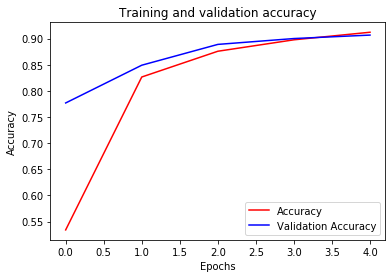

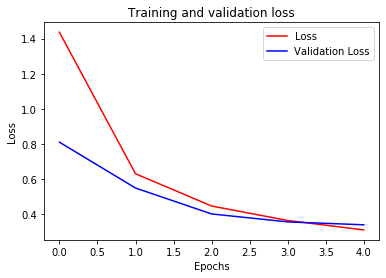

<Figure size 432x288 with 0 Axes>

In [36]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


##### 调包

In [1]:
import pandas as pd
import numpy as np 
import gc
import gensim
from gensim.models.word2vec import LineSentence
from gensim.models import Word2Vec
import multiprocessing

train_df=pd.read_csv('train_set.csv')
test_df=pd.read_csv('test_a.csv')
#text = pd.concat([train_df['text_nostopwords'][:50000],test_df['text_nostopwords'][:10000]],axis=0).values
#del train_df,test_df

In [2]:
text_all = pd.concat([train_df['text_nostopwords'][:50000],test_df['text_nostopwords'][:10000]]).values.tolist()

In [3]:
def word2vec(sg=1):
    model = Word2Vec(LineSentence(text_all),
                 size=100,
                 window=5,
                 sg=sg,
                 hs=1,
                 min_count=10,
                 iter=10,
                 workers=8)
    if sg==1:
        model.save('sg.model')
    else:
        model.save('cb.model')
    
    return 







#### TextCNN

TextCNN利用CNN（卷积神经网络）进行文本特征抽取，不同大小的卷积核分别抽取n-gram特征，卷积计算出的特征图经过MaxPooling保留最大的特征值，然后将拼接成一个向量作为文本的表示。

这里我们基于TextCNN原始论文的设定，分别采用了100个大小为2,3,4的卷积核，最后得到的文本向量大小为100*3=300维。



![](https://img-blog.csdnimg.cn/20200714205932720.jpeg)

#### TextRNN

TextRNN利用RNN（循环神经网络）进行文本特征抽取，由于文本本身是一种序列，而LSTM天然适合建模序列数据。TextRNN将句子中每个词的词向量依次输入到双向双层LSTM，分别将两个方向最后一个有效位置的隐藏层拼接成一个向量作为文本的表示。


![5](https://img-blog.csdnimg.cn/20200714210806492.png)

### 基于TextCNN、TextRNN的文本表示

#### TextCNN

* 模型搭建

```
self.filter_sizes = [2, 3, 4]  # n-gram window
self.out_channel = 100
self.convs = nn.ModuleList([nn.Conv2d(1, self.out_channel, (filter_size, input_size), bias=True) for filter_size in self.filter_sizes])
```

* 前向传播

```
pooled_outputs = []
for i in range(len(self.filter_sizes)):
    filter_height = sent_len - self.filter_sizes[i] + 1
    conv = self.convs[i](batch_embed)
    hidden = F.relu(conv)  # sen_num x out_channel x filter_height x 1

    mp = nn.MaxPool2d((filter_height, 1))  # (filter_height, filter_width)
    # sen_num x out_channel x 1 x 1 -> sen_num x out_channel
    pooled = mp(hidden).reshape(sen_num, self.out_channel)
    
    pooled_outputs.append(pooled)
```

#### TextRNN

* 模型搭建

```
input_size = config.word_dims

self.word_lstm = LSTM(
    input_size=input_size,
    hidden_size=config.word_hidden_size,
    num_layers=config.word_num_layers,
    batch_first=True,
    bidirectional=True,
    dropout_in=config.dropout_input,
    dropout_out=config.dropout_hidden,
)
```

* 前向传播

```
hiddens, _ = self.word_lstm(batch_embed, batch_masks)  # sent_len x sen_num x hidden*2
hiddens.transpose_(1, 0)  # sen_num x sent_len x hidden*2

if self.training:
    hiddens = drop_sequence_sharedmask(hiddens, self.dropout_mlp)
```

### 使用HAN用于文本分类

[Hierarchical Attention Network for Document Classification](https://link.zhihu.com/?target=http%3A//www.aclweb.org/anthology/N16-1174)(HAN)基于层级注意力，在单词和句子级别分别编码并基于注意力获得文档的表示，然后经过Softmax进行分类。其中word encoder的作用是获得句子的表示，可以替换为上节提到的TextCNN和TextRNN，也可以替换为下节中的BERT。



![Sequence Intent Classification Using Hierarchical Attention...](https://img-blog.csdnimg.cn/20200714210015326.png)

### 本章小结

本章介绍了Word2Vec的使用，以及TextCNN、TextRNN的原理和训练，最后介绍了用于长文档分类的HAN。

### 本章作业

- 尝试通过Word2Vec训练词向量
- 尝试使用TextCNN、TextRNN完成文本表示
- 尝试使用HAN进行文本分类

**参考：**

1. https://mp.weixin.qq.com/s/I-yeHQopTFdNk67Ir_iWiA
2. https://github.com/hecongqing/2018-daguan-competition




**参考：**

1. [CS224n笔记2 词的向量表示：word2vec](http://www.hankcs.com/nlp/word-vector-representations-word2vec.html)

2. [斯坦福大学深度学习与自然语言处理第二讲：词向量 ](http://www.52nlp.cn/%E6%96%AF%E5%9D%A6%E7%A6%8F%E5%A4%A7%E5%AD%A6%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%E4%B8%8E%E8%87%AA%E7%84%B6%E8%AF%AD%E8%A8%80%E5%A4%84%E7%90%86%E7%AC%AC%E4%BA%8C%E8%AE%B2%E8%AF%8D%E5%90%91%E9%87%8F)

3. [(Stanford CS224d) Deep Learning and NLP课程笔记（三）：GloVe与模型的评估](https://www.cnblogs.com/iloveai/p/cs224d-lecture3-note.html)

4. [http://www.cnblogs.com/pinard/p/7249903.html](http://www.cnblogs.com/pinard/p/7249903.html)

5. [https://blog.csdn.net/yinkun6514/article/details/79218736](https://blog.csdn.net/yinkun6514/article/details/79218736)

6. [https://www.leiphone.com/news/201706/PamWKpfRFEI42McI.html](https://www.leiphone.com/news/201706/PamWKpfRFEI42McI.html)